In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='Id', ylabel='SepalLengthCm'>

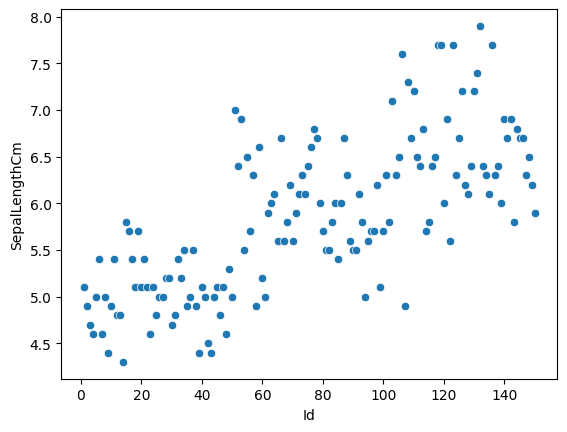

In [13]:
sns.scatterplot(x=df['Id'],y=df['SepalLengthCm'])

<Axes: >

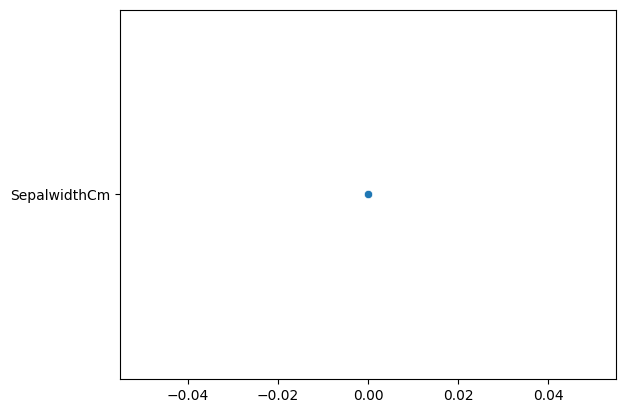

In [16]:
sns.scatterplot('SepalwidthCm')

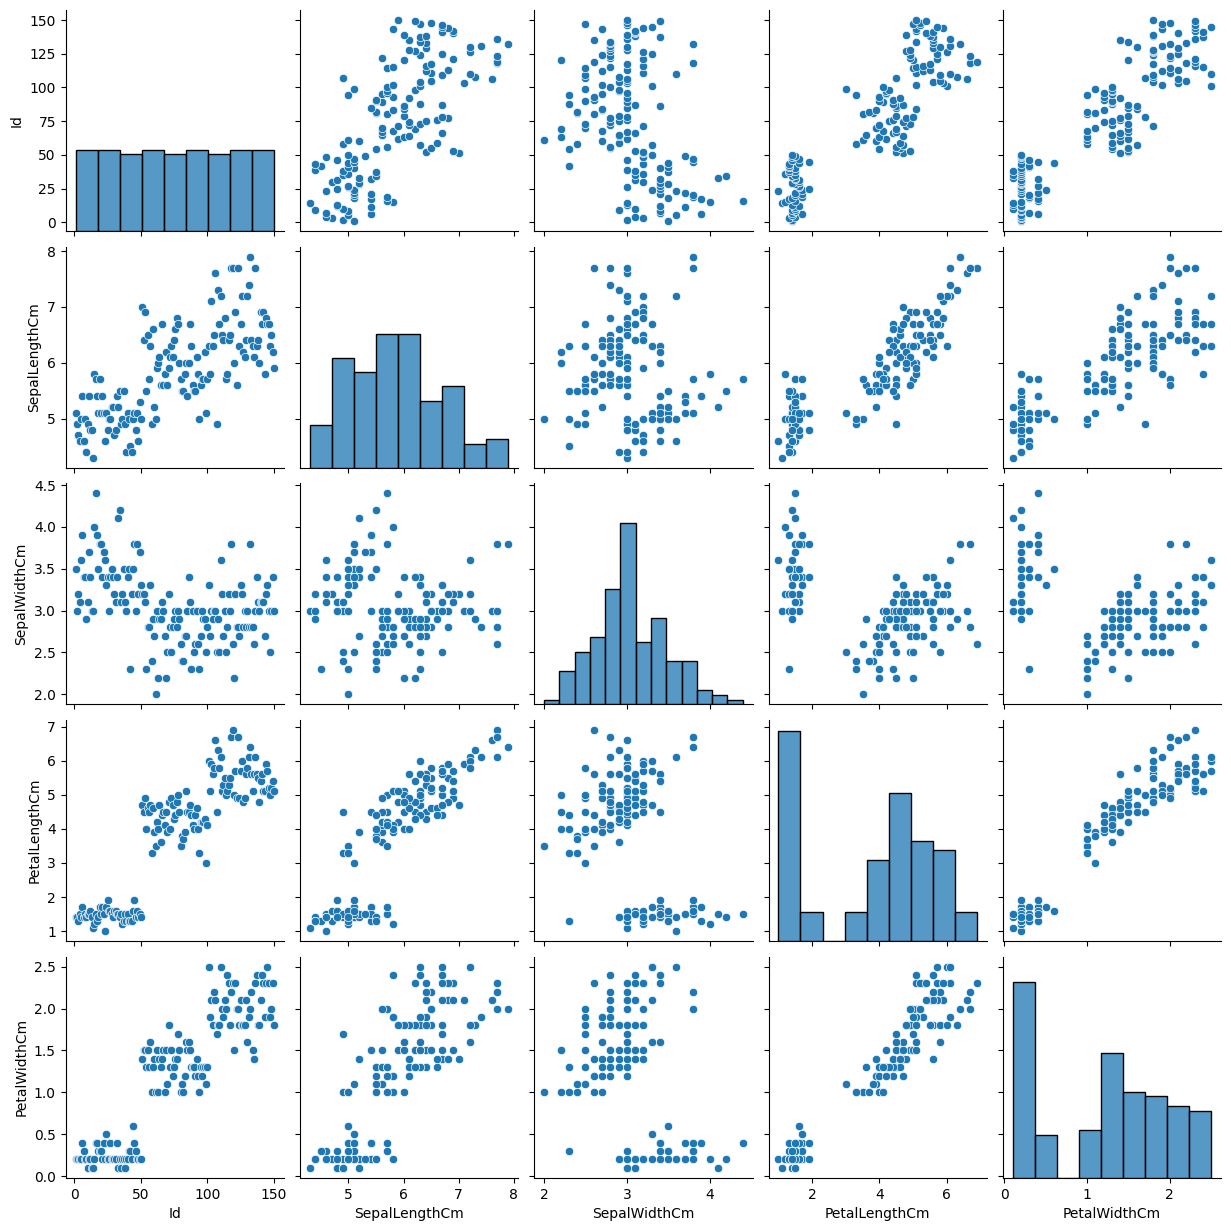

In [17]:
sns.pairplot(df)

In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

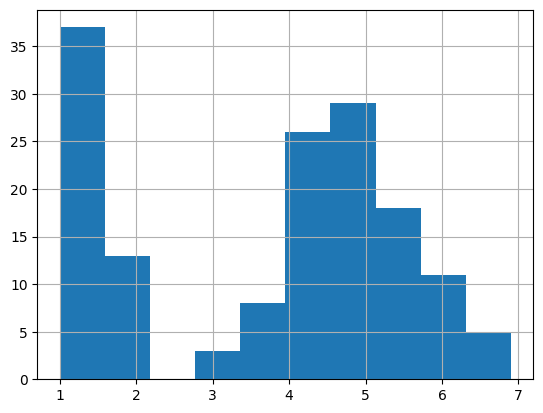

In [23]:
df['PetalLengthCm'].hist()

<Axes: >

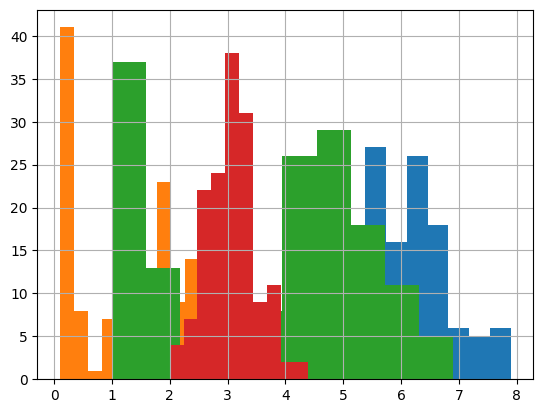

In [25]:
df['SepalLengthCm'].hist()
df['PetalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['SepalWidthCm'].hist()

In [19]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [29]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
37,38,4.9,3.1,1.5,0.1
52,53,6.9,3.1,4.9,1.5
108,109,6.7,2.5,5.8,1.8
42,43,4.4,3.2,1.3,0.2
13,14,4.3,3.0,1.1,0.1


In [30]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
12,13,4.8,3.0,1.4,0.1
69,70,5.6,2.5,3.9,1.1
71,72,6.1,2.8,4.0,1.3
113,114,5.7,2.5,5.0,2.0
107,108,7.3,2.9,6.3,1.8


In [31]:
y_train.head()

37         Iris-setosa
52     Iris-versicolor
108     Iris-virginica
42         Iris-setosa
13         Iris-setosa
Name: Species, dtype: object

In [32]:
y_test.head()

12         Iris-setosa
69     Iris-versicolor
71     Iris-versicolor
113     Iris-virginica
107     Iris-virginica
Name: Species, dtype: object

In [27]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
print("Accuracy (Logistic Regression): ", model1.score(x_test, y_test) * 100)

Accuracy (Logistic Regression):  98.33333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
print("Accuracy (KNN): ", model2.score(x_test, y_test) * 100)

Accuracy (KNN):  100.0


In [33]:
from sklearn.metrics import confusion_matrix

In [43]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

In [44]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

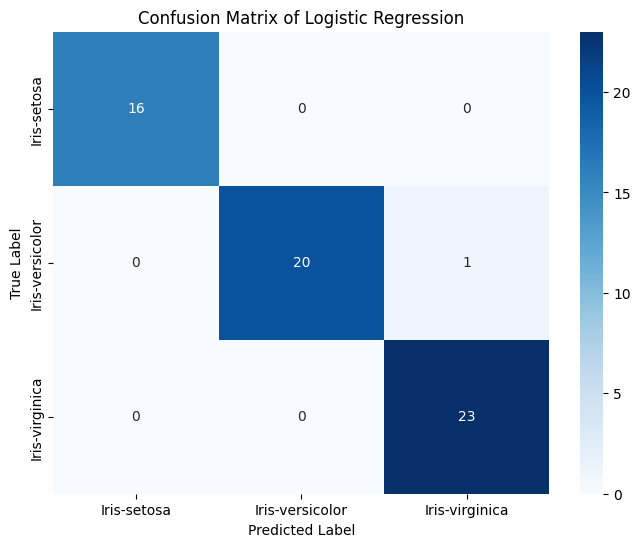

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

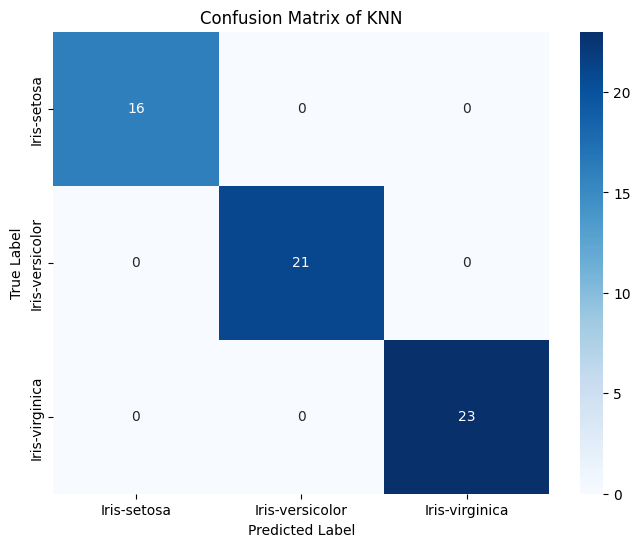

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()